In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SKKU_SoftwareEngineeringRecommendation/Data/booklec.csv')

In [3]:
df.head

<bound method NDFrame.head of       book_id         lec prof  ... rating major difficulty
0           0  교실밖창업과실무기초  김경환  ...   4.29     0          0
1           1   교육방법및교육공학  서향희  ...   3.06     1          0
2           2   교육방법및교육공학  서향희  ...   3.06     1          0
3           3   교육방법및교육공학  강성원  ...   3.06     1          0
4           4        교육심리  김명숙  ...   4.38     1          0
...       ...         ...  ...  ...    ...   ...        ...
1335     1335      제어공학기초  박기헌  ...   3.50    15          2
1336     1336      제어공학기초  박기헌  ...   3.50    15          2
1337     1337       데이터통신  이태진  ...   4.09    17          2
1338     1338        생체역학  엄길호  ...   2.00    65          2
1339     1339      스포츠통계학  엄한주  ...   2.00    53          2

[1340 rows x 11 columns]>

difficulty

0 : 교양

1 : 전공 저학년

2 : 전공 고학년

3 : 학석공통

In [0]:
df['major'] = df['major'].apply(lambda x : 18 if x == 38 else x)

In [0]:
df_major = df[df['difficulty']>=2]
df_minor = df[df['difficulty']==1]

In [6]:
print(len(df_major))
print(len(df_minor))

374
635


### Sample 조사로 각 학과에서 무슨 수업을 듣는지 뽑아서 학수번호 일치하는것과 합해줌.(확인결과 샘플은 타전공도 많이 포함. 개인마다 듣는 교양, 전공일반 등이 다르므로 sample이 noise의 역할을 해줌)

In [0]:
#심리학과
psychology = [34, 294, 295, 296, 297, 298, 433, 450, 451, 452, 563, 564, 565, 566, 567, 568, 569, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 832, 833, 834, 835, 836, 837, 875, 893, 894, 895, 959, 960, 961, 982, 1266, 1267, 1268, 1269, 1270, 1271, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286]

#경제학과
economics = [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 96, 97, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 161, 176, 182, 183, 184, 185, 186, 197, 204, 205, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 433, 434, 735, 742, 746, 748, 776, 777, 778, 799, 927, 928, 929, 999, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1053, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1096, 1095, 1100, 1301, 1302, 1303]

#경영학과
business = [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 180, 181, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 208, 209, 210, 213, 214, 215, 216, 217, 218, 243, 244, 245, 246, 247, 264, 268, 277, 308, 309, 310, 311, 312, 373, 374, 375, 378, 379, 380, 699, 700, 776, 778, 923, 924, 925, 926, 927, 928, 929, 991, 992, 993, 994, 995, 996, 997, 998, 1000, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1020, 1021, 1025, 1026, 1027, 1028, 1030, 1032, 1033, 1034, 1035, 1036, 1037, 1054, 1097, 1098, 1099, 1100, 1119, 1293, 1294]

#컴공
computer = [385, 386,387,388,389,382,383,384, 502, 555, 556, 557, 558, 559, 608, 611, 620, 628, 629, 771, 793, 826, 863, 864, 865, 867, 868, 873, 877, 889, 950, 951, 1038, 1246, 1247, 1248, 1249, 1250, 1251, 1253, 1254, 1255,1256, 1333, 1339]

#전전
electronic = [317, 342, 343, 344, 345, 346, 349, 366, 381, 382, 383, 384, 385, 386, 622, 623, 624, 625, 626, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 831, 855, 856, 857, 858, 859, 860, 865, 866, 867, 868, 869, 870, 879, 882, 883, 884, 885, 886, 887, 888, 1165, 1337]

- 경영학과 : major == 3 (bus)
- 경제학과 : major == 4(eco)
- 심리학과 : major == 8(psy)
- 전기전자 : major == 15(eee)
- 컴퓨터 : major == 18,38(SWE, COM)

In [0]:
a = df[df['major']==3].book_id.reset_index(drop=True).tolist()
bus = business+a
business = list(set(bus))

In [0]:
a = df[df['major']==4].book_id.reset_index(drop=True).tolist()
eco = economics+a
economics = list(set(eco))

In [0]:
a = df[df['major']==8].book_id.reset_index(drop=True).tolist()
psy = psychology+a
psychology = list(set(psy))

In [0]:
a = df[df['major']==15].book_id.reset_index(drop=True).tolist()
eee = electronic+a
electronic = list(set(eee))

In [0]:
a = df[df['major']==18].book_id.reset_index(drop=True).tolist()
b = df[df['major']==38].book_id.reset_index(drop=True).tolist()
com = computer + a + b
computer = list(set(com))

### Train Data 생성.
추출된 5개학과에서 사용하는 책을 기준으로 일정 수만 큼의 책을 sampling 해서 사용한다.

In [0]:
import random
from random import randint

id, 

password아무거나, 

last_login-null

is_superuser == 0

is_staff == 0

is_active == 1

date_joined == null

uname == user이름 아무거나

email - primary key

gender == random

major = 영어세글자

phone_number 0(string)



In [0]:
major = ['PSY','ECO','BUS','COM','EEE']

In [15]:
usertable = pd.DataFrame(columns=['user','password','last_login','is_superuser','is_staff','is_active','date_joined','uname','email','gender','major','phone_number'])
for i in range(5):
  for j in range(200):
      
      usertable = usertable.append(pd.Series([(i)*200 + (j+1), '0000', '2020-05-24 22:27:56.000000', 0, 0,1,'2020-05-24 22:27:56.000000',
                                              'MyName',
                                              "dummy"+str(i*200 + (j+1)) + "@gmail.com",randint(0,1) ,major[i],
                                              '010-0000-0000'],index=['user','password','last_login','is_superuser','is_staff','is_active','date_joined','uname','email','gender','major','phone_number']), ignore_index=True)

usertable.shape

(1000, 12)

In [16]:
usertable.head()

,user,password,last_login,is_superuser,is_staff,is_active,date_joined,uname,email,gender,major,phone_number
0,1,0000,2020-05-24 22:27:56.000000,0,0,1,2020-05-24 22:27:56.000000,MyName,dummy1@gmail.com,0,PSY,010-0000-0000
1,2,0000,2020-05-24 22:27:56.000000,0,0,1,2020-05-24 22:27:56.000000,MyName,dummy2@gmail.com,0,PSY,010-0000-0000
2,3,0000,2020-05-24 22:27:56.000000,0,0,1,2020-05-24 22:27:56.000000,MyName,dummy3@gmail.com,1,PSY,010-0000-0000
3,4,0000,2020-05-24 22:27:56.000000,0,0,1,2020-05-24 22:27:56.000000,MyName,dummy4@gmail.com,1,PSY,010-0000-0000
4,5,0000,2020-05-24 22:27:56.000000,0,0,1,2020-05-24 22:27:56.000000,MyName,dummy5@gmail.com,0,PSY,010-0000-0000


In [0]:
usertable[['password','uname','email','major','phone_number']] = usertable[['password','uname','email','major','phone_number']].astype(str)
usertable[['user','is_superuser','is_staff','is_active','gender']] = usertable[['user','is_superuser','is_staff','is_active','gender']].astype(np.uint64)

In [0]:
usertable.to_csv('/content/drive/My Drive/Colab Notebooks/SKKU_SoftwareEngineeringRecommendation/Data/usertable.csv')

In [0]:
psy_sample = []
eco_sample = []
bus_sample = []
com_sample = []
ele_sample = []
for i in range(200):
  psy = random.sample(psychology, randint(10,50))
  eco = random.sample(economics, randint(10,70))
  bus = random.sample(business, randint(10,70))
  com = random.sample(computer, randint(10,50))
  ele = random.sample(electronic, randint(10,50))
  psy_sample.append(psy)
  eco_sample.append(eco)
  bus_sample.append(bus)
  com_sample.append(com)
  ele_sample.append(ele)

In [0]:
sample = []
sample.append(psy_sample)
sample.append(eco_sample)
sample.append(bus_sample)
sample.append(com_sample)
sample.append(ele_sample)

In [21]:
user = pd.DataFrame(columns=['User','book_id'])
for i in range(5):
  for j in range(200):
    for k in range(len(sample[i][j])):
      if sample[i][j][k] in df_major['book_id'].tolist():
        user = user.append(pd.Series([(i)*200 + (j+1), sample[i][j][k]], index=['User','book_id']), ignore_index=True)

user.shape

(10571, 2)

In [22]:
user.tail(5)

,User,book_id
10566,999,1335
10567,1000,665
10568,1000,654
10569,1000,668
10570,1000,391


In [23]:
df.tail()

,book_id,lec,prof,bk,publisher,author,serial,credit,rating,major,difficulty
1335,1335,제어공학기초,박기헌,Automatic Control Systems (BK+CD),Wiley,Kuo/ Golnaraghi,EEE3024-41,3,3.50,15,2
1336,1336,제어공학기초,박기헌,Kuo의 자동제어(8판),Wiley,"Kuo, Farid Golnaraghi",EEE3024-41,3,3.50,15,2
1337,1337,데이터통신,이태진,데이터통신과 네트워킹(5판),McGraw-Hill,Forouzan,ICE3025-41,3,4.09,17,2
1338,1338,생체역학,엄길호,생체역학 사례기반 접근,한미의학,"Sean P Flanagan, 김용운, 서정석, 엄길호, 이기광",EBM3007-41,3,2.00,65,2
1339,1339,스포츠통계학,엄한주,통계학: 이해와 응용(2판)(양장본 HardCover),시그마프레스,"유극렬, 박주헌",SPT3044-41,3,2.00,53,2


In [0]:
user = pd.merge(user, df, on='book_id', how='inner')

In [25]:
user.describe()

,credit,rating,major,difficulty
count,10571.000000,10571.000000,10571.000000,10571.000000
mean,2.991108,3.786391,14.445559,2.007379
std,0.093883,0.891662,13.995943,0.085586
min,2.000000,0.000000,3.000000,2.000000
25%,3.000000,3.400000,4.000000,2.000000
50%,3.000000,4.050000,8.000000,2.000000
75%,3.000000,4.400000,18.000000,2.000000
max,3.000000,5.000000,59.000000,3.000000


In [0]:
user[['User','book_id','rating']] = user[['User','book_id','rating']].astype(np.uint16)

In [27]:
user.reset_index(inplace=True, drop=True)
user.describe()

,User,book_id,credit,rating,major,difficulty
count,10571.000000,10571.000000,10571.000000,10571.000000,10571.000000,10571.000000
mean,508.676946,683.600416,2.991108,3.377732,14.445559,2.007379
std,293.968887,380.994423,0.093883,0.874246,13.995943,0.085586
min,1.000000,179.000000,2.000000,0.000000,3.000000,2.000000
25%,247.000000,298.000000,3.000000,3.000000,4.000000,2.000000
50%,519.000000,664.000000,3.000000,4.000000,8.000000,2.000000
75%,769.000000,1078.000000,3.000000,4.000000,18.000000,2.000000
max,1000.000000,1339.000000,3.000000,5.000000,59.000000,3.000000


### Book2Vec

In [28]:
lecture_2_book_name = dict(df[['lec','bk']].values)
lecture_2_book_name

{'20세기러시아문학과사회': '롤리타',
 '4차산업혁명과과학문화': '클라우스 슈밥의 제4차 산업혁명 더 넥스트(The Next)',
 'Advertising and Promotion Management': 'Advertising &amp; Promotion',
 'Asset Pricing': '재무경제학',
 'Business Statistics II': 'Statistics for Managers Using Microsoft Excel',
 'Consumer Behavior': 'Consumer Behavior',
 'Current Topics in Finance': 'Equity Asset Valuation 2/E (Hardcover)',
 'Econometrics': 'Basic Econometrics',
 'Economic Development': 'Economic Growth 3/E (Paperback)',
 'FYE세미나Ⅰ': '새내기 멘토링',
 'Financial Management': 'Principles of Corporate Finance Concise',
 'Game Theory': 'Introduction to Game Theory',
 'IT Management': 'Information Technology For Management',
 'Intermediate Accounting I': 'Intermediate Accounting',
 'Intermediate Corporate Finance': 'Studyguide for Investment Valuation: Tools and Techniques for...',
 'Intermediate Investments': 'Exam Prep for Essentials of Investments by Bodie, Kane, &amp; Marcus, 6th Ed.',
 'Intermediate Macroeconomic Theory': 'Macroeconomics 6/E',
 'Inter

In [29]:
id_2_book_name = dict(df[['book_id','bk']].values)
id_2_book_name

{0: '과학기술창업론(대학생을 위한)',
 1: '교육방법 및 교육공학(2판)',
 2: '교육방법 및 교육공학(3판)(양장본 HardCover)',
 3: '교수-학습과 교육공학(3판)(양장본 HardCover)',
 4: '교육심리학(3판)(양장본 HardCover)',
 5: '교육심리학(4판)(양장본 HardCover)',
 6: '교육학개론',
 7: '교육의 사회학적 이해(3판)(3판)(양장본 HardCover)',
 8: '교육학개론(최신)(2판)(양장본 HardCover)',
 9: '교육행정학 원론(6판)(양장본 HardCover)',
 10: '교육행정학원론(5판)',
 11: '교육행정 및 학교경영의 이해(개정판 3판)(양장본 HardCover)',
 12: '속기의 길잡이 (기본편/약법편) 속기공부(전3권)',
 13: '쉽고 재미있는 속기의 길잡이 (기본편)',
 14: '수리논술의 이론과 실제(2판)',
 15: '법학적성시험 문제 해설: 언어이해 영역(2014~2018)',
 16: '법학적성시험 안내서 LEET',
 17: '인터넷 윤리(2판)',
 18: '인터넷 윤리(4차 산업혁명 시대의)(3판)',
 19: '워드프로세서 실기(2019)(시나공)(CD1장포함)',
 20: '특수교육학개론(양장본 HardCover)',
 21: '특수아동교육(3판)(양장본 HardCover)',
 22: '특수아동의 이해(3판)(양장본 HardCover)',
 23: '학교폭력 예방 및 학생의 이해',
 24: '학교 폭력 예방의 이론과 실제(개정판)(양장본 HardCover)',
 25: '학교폭력 예방의 이론과 실제',
 26: '학교폭력의 예방과 대책(사례와 판례로 이해하는)',
 27: '관리회계(2판)(양장본 HardCover)',
 28: '관리회계(3판)(양장본 HardCover)',
 29: '관리회계(양장본 HardCover)',
 30: '원가관리회계(5판)',
 31: '원가관리회계(K-IFRS 반영)(증보판 5판)(양장본

In [0]:
import pickle
a_file = open("/content/drive/My Drive/Colab Notebooks/SKKU_SoftwareEngineeringRecommendation/Data/id_2_book_name.pkl", "wb")
pickle.dump(id_2_book_name, a_file)
b_file = open("/content/drive/My Drive/Colab Notebooks/SKKU_SoftwareEngineeringRecommendation/Data/lecture_2_book_name.pkl", "wb")
pickle.dump(lecture_2_book_name, b_file)
a_file.close()
b_file.close()

In [0]:
grouped = user.groupby(['User'])

In [32]:
user

,User,book_id,lec,prof,bk,publisher,author,serial,credit,rating,major,difficulty
0,1,295,국제금융론,조두연,International Economics 11/E,Pearson / Prentice Hall,Krugman,ECO3015-01,3,3,4,2
1,6,295,국제금융론,조두연,International Economics 11/E,Pearson / Prentice Hall,Krugman,ECO3015-01,3,3,4,2
2,9,295,국제금융론,조두연,International Economics 11/E,Pearson / Prentice Hall,Krugman,ECO3015-01,3,3,4,2
3,10,295,국제금융론,조두연,International Economics 11/E,Pearson / Prentice Hall,Krugman,ECO3015-01,3,3,4,2
4,11,295,국제금융론,조두연,International Economics 11/E,Pearson / Prentice Hall,Krugman,ECO3015-01,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
10566,988,1162,광학기초,송장근,광학(OPTICS)(4판),자유아카데미,"Eugene Hecht, 장수, 황보창권, 조두진",EEE3006-41,3,4,15,2
10567,989,1162,광학기초,송장근,광학(OPTICS)(4판),자유아카데미,"Eugene Hecht, 장수, 황보창권, 조두진",EEE3006-41,3,4,15,2
10568,992,1162,광학기초,송장근,광학(OPTICS)(4판),자유아카데미,"Eugene Hecht, 장수, 황보창권, 조두진",EEE3006-41,3,4,15,2
10569,993,1162,광학기초,송장근,광학(OPTICS)(4판),자유아카데미,"Eugene Hecht, 장수, 황보창권, 조두진",EEE3006-41,3,4,15,2


In [0]:
user.to_csv('/content/drive/My Drive/Colab Notebooks/SKKU_SoftwareEngineeringRecommendation/Data/user.csv')

In [34]:
user[user['User'] == 1000]

,User,book_id,lec,prof,bk,publisher,author,serial,credit,rating,major,difficulty
9532,1000,665,고분자화학,김지흥,Polymer Chemistry: An Introduction,Oxford USA,Stevens Malcolm P,CHY3025-41,3,4,50,2
9600,1000,391,디스플레이공학,이준신,디스플레이 공학개론,홍릉과학출판사,"이준신, 김도영, 모연곤, 배병성, 송장근",EEE3009-41,3,4,15,2
9737,1000,654,분자생물학,오정수,분자생물학 유전체 기능의 원리,홍릉과학출판사,"Craig, Cohen-Fix, Green, Greider, Storz",FBT3011-41,3,0,48,2
10056,1000,668,고분자화학,배진영,고분자화학(제3판),사이텍미디어,GEORGE ODIAN,CHY3025-41,3,4,50,2


In [35]:
len(grouped)

996

In [0]:
book_list = []

for idx, user in grouped:
  arr = ""  
  for i in range(len(user.sort_values(['rating'])['bk'].values)):
    arr = arr + "@@!@" + str(user.sort_values(['rating'])['bk'].values[i])
  book_list.append(arr.split("@@!@")[1:])

In [0]:
# !pip install gensim

In [0]:
from gensim.models.word2vec import Word2Vec

In [0]:
b2b = Word2Vec(sentences = book_list,
               size=50, 
               window=5, 
               min_count=1,
               workers=4)

In [0]:
## selected book이 한사람의 모든 책들.
for idx, user in grouped:
  if idx == 731:
    selected_book = user['bk'].values
    break

In [41]:
a = b2b.wv.most_similar(selected_book, topn=30)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [42]:
selected_book

array(['Data Communications and Networking (Global Edition)',
       'Operating System Concepts', '통계학: 이해와 응용(2판)(양장본 HardCover)',
       'HTML5 + CSS3 + JavaScript로 배우는 웹프로그래밍 기초',
       "Schaum's Outline of General Topology",
       '소프트웨어 공학(쉽게 배우는)(IT CookBook 192)', 'Software Engineering',
       '데이터베이스 개론(IT Cookbook 한빛 교재 시리즈 150)', '데이터베이스 개론과 실습(오라클로 배우는)',
       '컴퓨터 네트워킹 : 하향식 접근(7판)',
       'An Introduction to Programming Using Python', 'Atonement',
       '프로그래밍 언어론(IT Coolbook 한빛교재시리즈 87)(양장본 HardCover)',
       'Programming Languages, 4/E'], dtype=object)

In [43]:
a[0][0]

'Programming Languages'

In [44]:
a[0][1]

0.9996401071548462

넷플릭스는 여러가지 feature axis를 만들어 추가 적용.

In [45]:
selected_book

array(['Data Communications and Networking (Global Edition)',
       'Operating System Concepts', '통계학: 이해와 응용(2판)(양장본 HardCover)',
       'HTML5 + CSS3 + JavaScript로 배우는 웹프로그래밍 기초',
       "Schaum's Outline of General Topology",
       '소프트웨어 공학(쉽게 배우는)(IT CookBook 192)', 'Software Engineering',
       '데이터베이스 개론(IT Cookbook 한빛 교재 시리즈 150)', '데이터베이스 개론과 실습(오라클로 배우는)',
       '컴퓨터 네트워킹 : 하향식 접근(7판)',
       'An Introduction to Programming Using Python', 'Atonement',
       '프로그래밍 언어론(IT Coolbook 한빛교재시리즈 87)(양장본 HardCover)',
       'Programming Languages, 4/E'], dtype=object)

In [46]:
b2b.save('/content/drive/My Drive/Colab Notebooks/SKKU_SoftwareEngineeringRecommendation/model/b2b.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [47]:
df[df['bk']==selected_book[0]]['major'].values[0]

18

In [0]:
selected_book = '운영체제(9판)'

In [52]:
a = b2b.wv.most_similar(selected_book, topn=30)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [53]:
a[0][0]

'Programming Languages'

In [54]:
a[0][1]

0.9996401071548462

In [0]:
b=[]
for i in range(len(a)):
  b.append(list(a[i]))

In [56]:
b

[['Programming Languages', 0.9996401071548462],
 ['Computer Networking: A Top-Down Approach', 0.999608039855957],
 ['COMPUTER ORGANIZATION AND DESIGN 5/E(컴퓨터 구조 및 설계)', 0.9995831847190857],
 ['언론과 민주정치', 0.9995698928833008],
 ['First Course in Abstract Algebra (Paperback)', 0.9994946122169495],
 ['운영체제(9판)', 0.9994943141937256],
 ['현대 암호학(4판)', 0.9994833469390869],
 ['문제해결과 알고리즘(컴퓨팅사고력 향상을 위한)', 0.9994474053382874],
 ['모두의 파이썬', 0.9994401931762695],
 ['컴퓨터 구조 및 설계(5판)', 0.9993940591812134],
 ['Differential Geometry of Curves and Surfaces', 0.9993523359298706],
 ['프로그래밍 언어(새로 보는)(CD1장포함)', 0.9992823600769043],
 ['Introduction to Risk Management and Insurance', 0.9960808753967285],
 ['전략경영(글로벌 시대의 경쟁력 강화를 위한)(12판)', 0.9960296154022217],
 ['조직사회학(양장본 HardCover)', 0.9960126876831055],
 ['세법 워크북. 2(2020)(개정판 14판)', 0.995958149433136],
 ['China Marketing(중국마케팅)(개정판 3판)(양장본 HardCover)', 0.9959439039230347],
 ['세법강의. 1(2019)(31판)', 0.9959321022033691],
 ['MLA Handbook', 0.9959220886230469],
 [

In [64]:
final_book = np.array(sorted(b, key=lambda l:l[1], reverse=True))[:,0][:10]
final_book

array(['Programming Languages',
       'Computer Networking: A Top-Down Approach',
       'COMPUTER ORGANIZATION AND DESIGN 5/E(컴퓨터 구조 및 설계)', '언론과 민주정치',
       'First Course in Abstract Algebra (Paperback)', '운영체제(9판)',
       '현대 암호학(4판)', '문제해결과 알고리즘(컴퓨팅사고력 향상을 위한)', '모두의 파이썬',
       '컴퓨터 구조 및 설계(5판)'], dtype='<U49')

### For Evaluation : Plot, Clustring 해서 결과가 괜찮게 나오는지 평가.

### 이제 User가 들었던 과목을 빼고 추천하기 위해 사전조사 지식 추가. 혹은 추천 받는 칸에서 어떤 과목관련된것은 받지 않겠다 라고 추가할 수 있게?

In [0]:
import matplotlib.font_manager as fm
path_gothic = '/content/drive/My Drive/Colab Notebooks/NanumGothic.ttf'
prop = fm.FontProperties(fname = path_gothic)

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model):
    labels = []
    tokens = []

    for word in b2b.wv.vocab:
        tokens.append(b2b[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(30, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontproperties=prop)
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


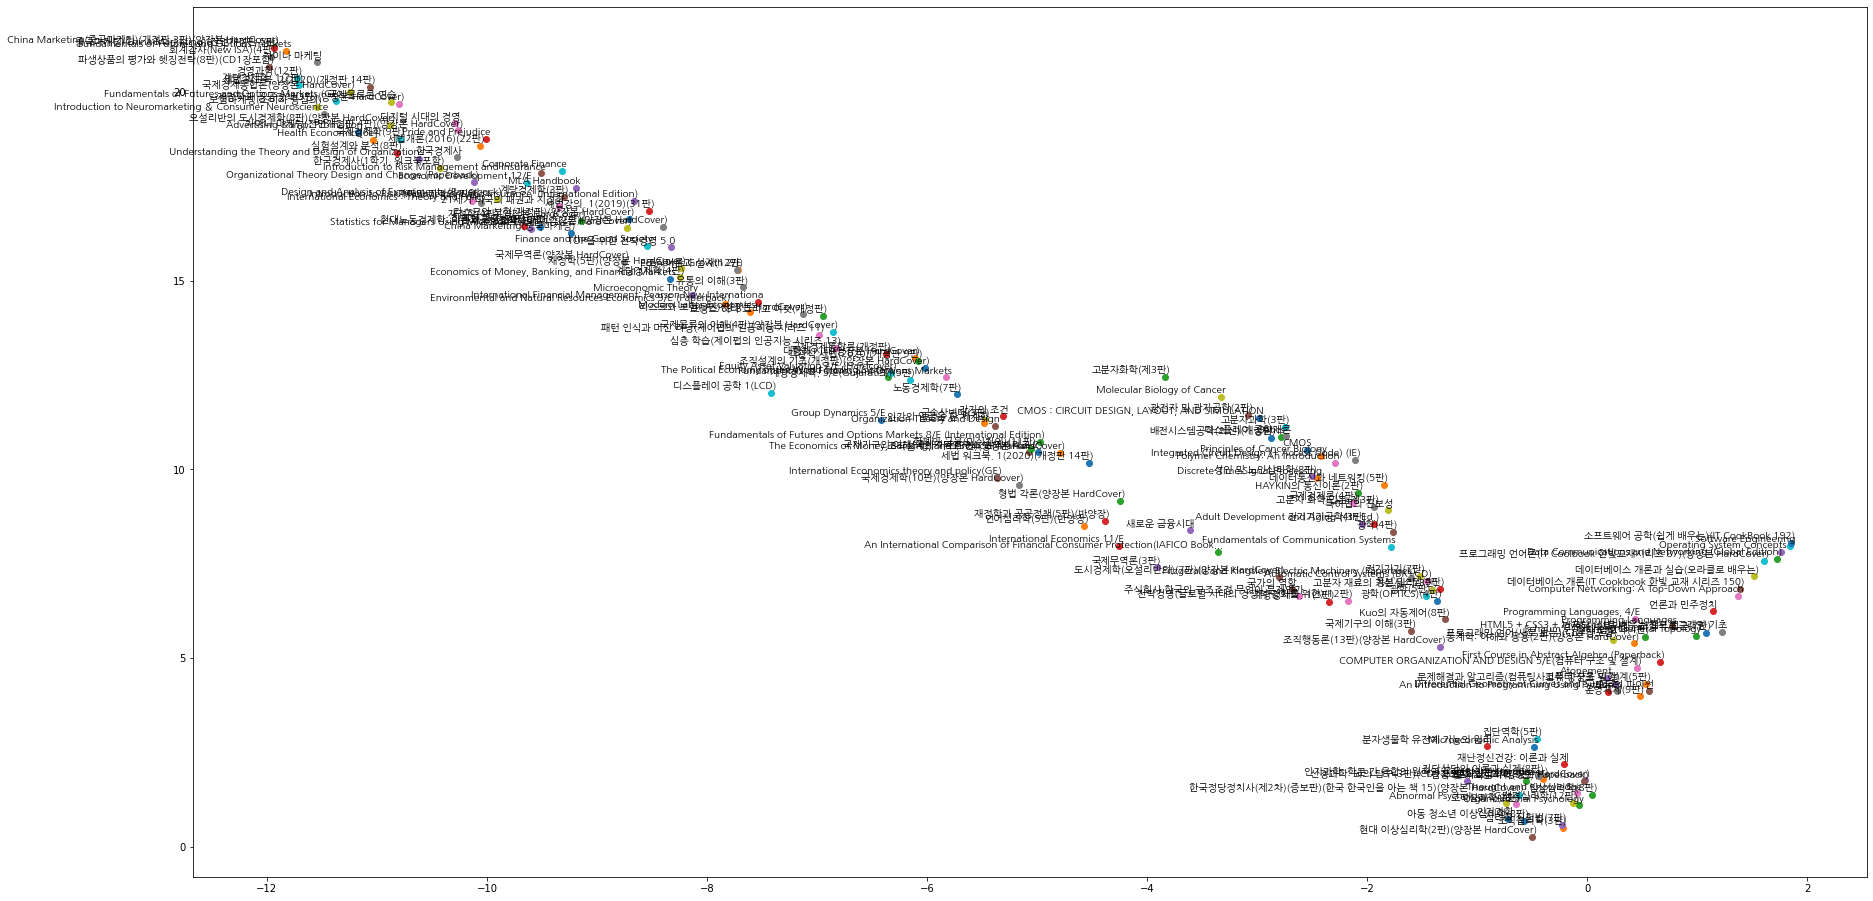

In [60]:
tsne_plot(b2b)

In [61]:
from sklearn.cluster import KMeans

word_vectors = b2b.wv.syn0 # 어휘의 feature vector
num_clusters = 30
print(num_clusters)

30


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

idx = list(idx)
names = b2b.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [63]:
for c in range(num_clusters):
    # 클러스터 번호를 출력
    print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])            
    print(words)


cluster 0
['유통의 이해(3판)', 'Microeconomic Theory', 'International Financial Management: Pearson New Internationa', 'Environmental and Natural Resources Economics 9/E (Paperback)', 'Modern Labor Economics', '리스크와 보험(3판)(양장본 HardCover)', '프랑스 하나 그리고 여럿(개정판)']

cluster 1
['모두의 파이썬', '컴퓨터 구조 및 설계(5판)', '문제해결과 알고리즘(컴퓨팅사고력 향상을 위한)', 'COMPUTER ORGANIZATION AND DESIGN 5/E(컴퓨터 구조 및 설계)', 'Atonement', 'Differential Geometry of Curves and Surfaces', '운영체제(9판)', 'An Introduction to Programming Using Python']

cluster 2
['Fundamentals of Futures and Options Markets (GE)', '계량경제학. 1(7판)', 'Introduction to Neuromarketing ＆ Consumer Neuroscience', '보험마케팅(소비자 중심의)', '재정학과 공공정책(3판)(양장본 HardCover)', '국제경제통합론(양장본 HardCover)', '세법 워크북. 2(2020)(개정판 14판)', '국제물류론 연습']

cluster 3
['An International Comparison of Financial Consumer Protection(IAFICO Book...', '형법 각론(양장본 HardCover)', '새로운 금융시대']

cluster 4
['현대 이상심리학(2판)(양장본 HardCover)']

cluster 5
['Optics', '광전자 및 광자공학(2판)', '디스플레이 공학개론', '배전시스템공학(최신)(개정판)', '